In [324]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


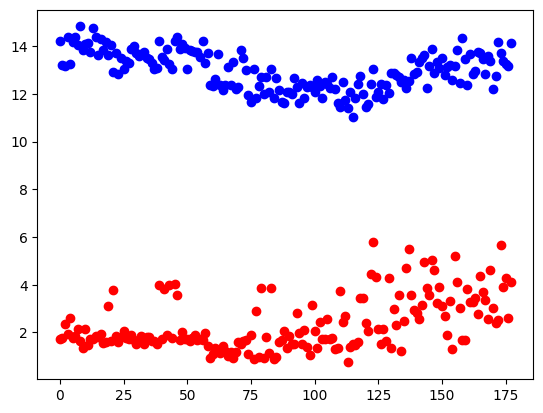

In [325]:
plt.scatter(x=df.index, y=df['alcohol'], color='blue', label='alcohol')
plt.scatter(x=df.index, y=df['malic_acid'], color='red', label='malic acid')
plt.plot()
plt.show()

In [326]:
df.count()

alcohol                         178
malic_acid                      178
ash                             178
alcalinity_of_ash               178
magnesium                       178
total_phenols                   178
flavanoids                      178
nonflavanoid_phenols            178
proanthocyanins                 178
color_intensity                 178
hue                             178
od280/od315_of_diluted_wines    178
proline                         178
dtype: int64

In [327]:
# This dataset is linearly seperable 
# independent and dependent features
x = wine.data
y = wine.target
# spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [328]:
# SVM uses distance and calculations; so it's better to scale down the values in cas eof wine dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [329]:
from sklearn.svm import SVC
classifier = SVC()

In [330]:
parameters = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

In [331]:
# We gotta do hyper parameter tuning here; to find the best parameters and best accuracy score
from sklearn.model_selection import GridSearchCV
svc_cv = GridSearchCV(estimator=classifier, param_grid=parameters,scoring='accuracy', cv=5)
svc_cv.fit(x_train, y_train)


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'linear']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [332]:
svc_cv.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [333]:
svc_cv.best_score_

np.float64(0.9916666666666668)

In [334]:
y_pred = svc_cv.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"report: {classification_report(y_test,y_pred)}")
print()
print(confusion_matrix(y_test, y_pred), "\n")
print(f"accuracy: {accuracy_score(y_test,y_pred)}")

report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      1.00      0.97        17
           2       1.00      0.96      0.98        25

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59


[[17  0  0]
 [ 0 17  0]
 [ 0  1 24]] 

accuracy: 0.9830508474576272
